In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
%matplotlib inline

In [3]:
img= cv2.imread('./testIMG/Shraddha-Kapoor.jpg')
img.shape

(800, 800, 3)

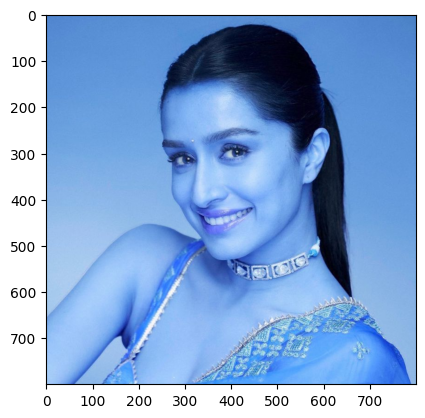

In [4]:
plt.imshow(img)

In [5]:
gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray

array([[148, 148, 150, ..., 141, 141, 141],
       [148, 149, 149, ..., 140, 140, 140],
       [150, 149, 149, ..., 141, 141, 141],
       ...,
       [212, 212, 212, ..., 190, 191, 191],
       [213, 212, 212, ..., 191, 191, 192],
       [214, 213, 213, ..., 191, 192, 193]], dtype=uint8)

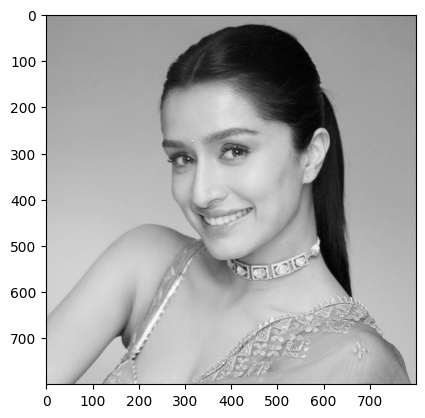

In [6]:
plt.imshow(gray, cmap= 'gray')

In [7]:
face_cascade= cv2.CascadeClassifier('./opencv/haarcascade_frontalface_default.xml')
eye_cascade= cv2.CascadeClassifier('./opencv/haarcascade_eye.xml')

In [8]:
faces= face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[154, 148, 404, 404]])

In [9]:
(x, y, w, h)= faces[0]
x, y, w, h

(154, 148, 404, 404)

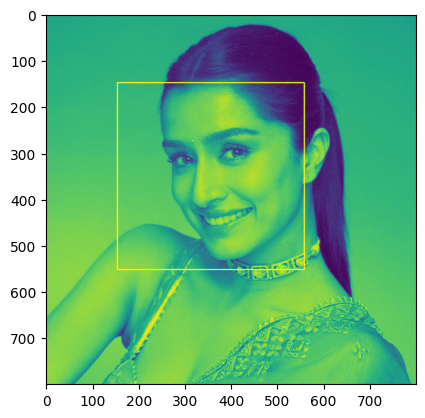

In [10]:
face_img= cv2.rectangle(gray,(x,y),(x+w,y+h),(255,0,0), 2)
plt.imshow(face_img)

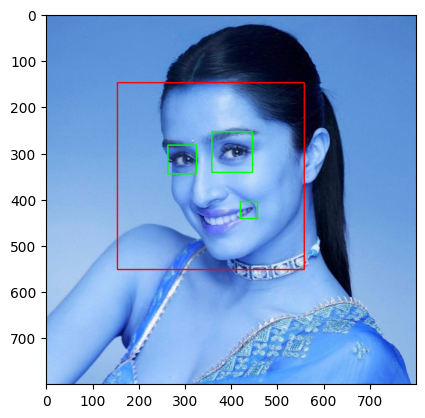

In [11]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

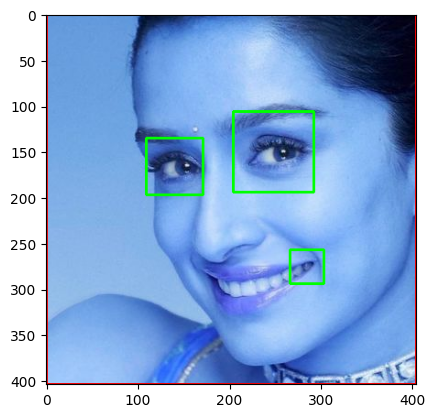

In [12]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [13]:
def croppedIMGif2eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

In [13]:
"""
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color
"""

'\ndef get_cropped_image_if_2_eyes(image_path):\n    img = cv2.imread(image_path)\n    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)\n    faces = face_cascade.detectMultiScale(gray, 1.3, 5)\n    for (x,y,w,h) in faces:\n        roi_gray = gray[y:y+h, x:x+w]\n        roi_color = img[y:y+h, x:x+w]\n        eyes = eye_cascade.detectMultiScale(roi_gray)\n        if len(eyes) >= 2:\n            return roi_color\n'

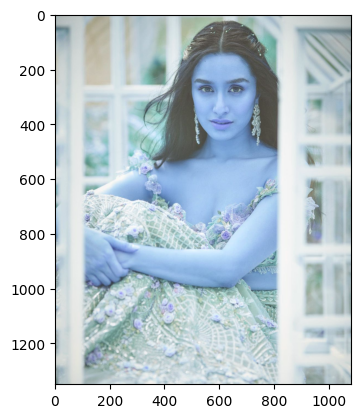

In [14]:
org_img= cv2.imread('./testIMG/2.jpeg')
plt.imshow(org_img)

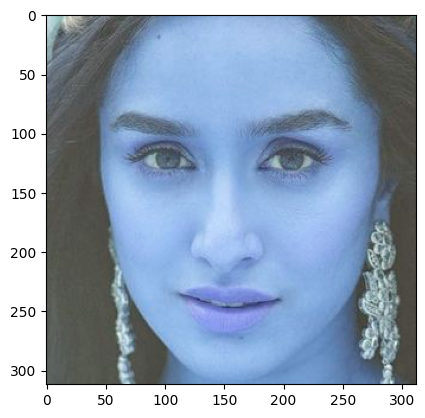

In [16]:
test_img= croppedIMGif2eyes('./testIMG/2.jpeg')
plt.imshow(test_img)

In [17]:
test_img

array([[[209, 222, 230],
        [205, 221, 228],
        [201, 219, 226],
        ...,
        [ 75,  96,  88],
        [ 89, 116, 107],
        [102, 136, 126]],

       [[210, 223, 231],
        [206, 222, 229],
        [202, 221, 228],
        ...,
        [ 96, 112, 105],
        [ 94, 118, 110],
        [ 95, 126, 117]],

       [[208, 224, 231],
        [207, 223, 230],
        [204, 223, 230],
        ...,
        [ 99, 113, 107],
        [ 82, 103,  95],
        [ 85, 112, 103]],

       ...,

       [[ 88,  95,  90],
        [ 90,  97,  92],
        [ 91,  98,  93],
        ...,
        [ 73,  70,  65],
        [ 72,  69,  64],
        [ 74,  71,  63]],

       [[ 87,  94,  89],
        [ 89,  96,  91],
        [ 91,  98,  93],
        ...,
        [ 69,  69,  63],
        [ 71,  68,  63],
        [ 74,  71,  63]],

       [[ 89,  95,  90],
        [ 92,  98,  93],
        [ 93,  99,  94],
        ...,
        [ 72,  72,  66],
        [ 74,  71,  66],
        [ 76,  73,  65]]

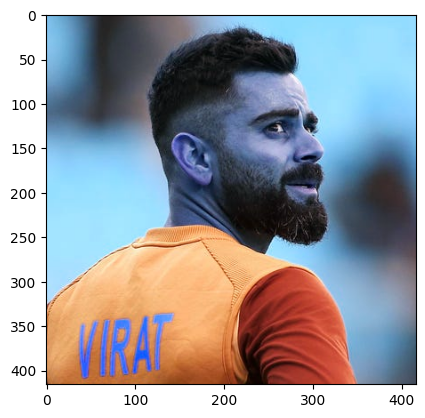

In [18]:
org_1eye= cv2.imread('./testIMG/0x0.jpg')
plt.imshow(org_1eye)

In [19]:
cropped_1eye= croppedIMGif2eyes('./testIMG/0x0.jpg')
cropped_1eye

#expected not to show any faces as single eye is detected

In [20]:
path_to_data= './dataset/'
path_to_croppedIMG= './dataset/cropped'

In [21]:
import os

img_dirs= []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [22]:
img_dirs

['./dataset/kartik aryaan',
 './dataset/kiara advani',
 './dataset/shraddha kapoor',
 './dataset/siddharth malhotra',
 './dataset/virat kohli']

In [34]:
import shutil

if os.path.exists(path_to_croppedIMG):
    shutil.rmtree(path_to_croppedIMG)
os.mkdir(path_to_croppedIMG)

In [23]:
croppedIMG_dirs= []
filename_dict= {}

for img_dir in img_dirs:
    count= 1
    IMGnames= img_dir.split('/')[-1]
    print(IMGnames)
    
    filename_dict[IMGnames]= []
    
    for entry in os.scandir(img_dir):
        try:
            roi_color= croppedIMGif2eyes(entry.path)
            if roi_color is not None:
                cropped_folder= path_to_croppedIMG + IMGnames
                if not os.path.exists(cropped_folder):
                    os.makedirs(cropped_folder)
                    croppedIMG_dirs.append(cropped_folder)
                    print('Generating CroppedIMGs at: ', cropped_folder)
                cropped_filename= IMGnames + str(count) + '.png'
                cropped_filepath= cropped_folder + '/' + cropped_filename

                cv2.imwrite(cropped_filepath, roi_color)
                filename_dict[IMGnames].append(cropped_filepath)
                count+=1
        except:
            print('errored: ', count)

kartik aryaan
Generating CroppedIMGs at:  ./dataset/croppedkartik aryaan
errored:  15
errored:  66
kiara advani
Generating CroppedIMGs at:  ./dataset/croppedkiara advani
shraddha kapoor
Generating CroppedIMGs at:  ./dataset/croppedshraddha kapoor
errored:  61
siddharth malhotra
Generating CroppedIMGs at:  ./dataset/croppedsiddharth malhotra
errored:  55
virat kohli
errored:  1
Generating CroppedIMGs at:  ./dataset/croppedvirat kohli


In [24]:
crIMGdict= filename_dict

In [25]:
crIMGdict

{'kartik aryaan': ['./dataset/croppedkartik aryaan/kartik aryaan1.png',
  './dataset/croppedkartik aryaan/kartik aryaan2.png',
  './dataset/croppedkartik aryaan/kartik aryaan3.png',
  './dataset/croppedkartik aryaan/kartik aryaan4.png',
  './dataset/croppedkartik aryaan/kartik aryaan5.png',
  './dataset/croppedkartik aryaan/kartik aryaan6.png',
  './dataset/croppedkartik aryaan/kartik aryaan7.png',
  './dataset/croppedkartik aryaan/kartik aryaan8.png',
  './dataset/croppedkartik aryaan/kartik aryaan9.png',
  './dataset/croppedkartik aryaan/kartik aryaan10.png',
  './dataset/croppedkartik aryaan/kartik aryaan11.png',
  './dataset/croppedkartik aryaan/kartik aryaan12.png',
  './dataset/croppedkartik aryaan/kartik aryaan13.png',
  './dataset/croppedkartik aryaan/kartik aryaan14.png',
  './dataset/croppedkartik aryaan/kartik aryaan15.png',
  './dataset/croppedkartik aryaan/kartik aryaan16.png',
  './dataset/croppedkartik aryaan/kartik aryaan17.png',
  './dataset/croppedkartik aryaan/kartik

# Wavelet Transformation

In [27]:
import pywt

In [28]:
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

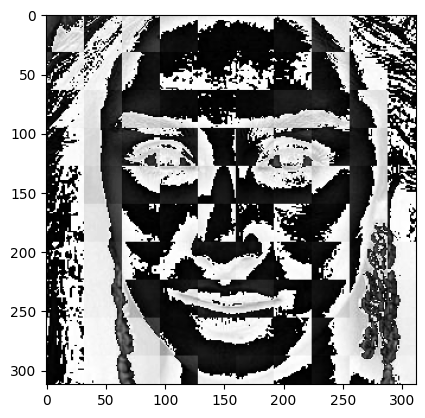

In [29]:
test1= w2d(test_img, 'db1', 5)
plt.imshow(test1, cmap='gray')

In [30]:
classDict= {}
count=0

for celebNames in crIMGdict.keys():
    classDict[celebNames]= count
    count= count+1
classDict

{'kartik aryaan': 0,
 'kiara advani': 1,
 'shraddha kapoor': 2,
 'siddharth malhotra': 3,
 'virat kohli': 4}

In [31]:
X= []
y= []

for celebNames, trainingFiles in crIMGdict.items():
    for trainingIMG in trainingFiles:
        IMG= cv2.imread(trainingIMG)
        if IMG is None:
            continue
        scaledRawIMG= cv2.resize(IMG, (32, 32))
        IMGhar= w2d(img, 'db1', 5)
        scaledIMGhar= cv2.resize(IMGhar, (32, 32))
        stackedIMG= np.vstack((scaledRawIMG.reshape(32*32*3, 1), scaledIMGhar.reshape(32*32, 1)))
        X.append(stackedIMG)
        y.append(classDict[celebNames])

In [32]:
len(X)

297

In [33]:
X= np.array(X).reshape(len(X), 4096).astype(float)
X.shape

(297, 4096)

# Training Model

In [45]:
!pip install scikit-learn

     ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/8.3 MB 1.3 MB/s eta 0:00:07
      --------------------------------------- 0.1/8.3 MB 1.3 MB/s eta 0:00:07
     - -------------------------------------- 0.2/8.3 MB 1.9 MB/s eta 0:00:05
     -- ------------------------------------- 0.5/8.3 MB 2.9 MB/s eta 0:00:03
     --- ------------------------------------ 0.7/8.3 MB 3.0 MB/s eta 0:00:03
     --- ------------------------------------ 0.7/8.3 MB 2.5 MB/s eta 0:00:04
     --- ------------------------------------ 0.7/8.3 MB 2.5 MB/s eta 0:00:04
     ---- ----------------------------------- 0.8/8.3 MB 2.2 MB/s eta 0:00:04
     ----- ---------------------------------- 1.1/8.3 MB 2.7 MB/s eta 0:00:03
     ----- ---------------------------------- 1.1/8.3 MB 2.4 MB/s eta 0:00:03
     ------ --------------------------------- 1.3/8.3 MB 2.5 MB/s eta 0:00:03
     ------ --------------------------------- 1.4/8.3 MB 2.7 MB/s eta 0

In [34]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7666666666666667

In [54]:
X_test.shape

(60, 4096)

In [55]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.69      0.75        13
           1       0.87      0.72      0.79        18
           2       0.69      0.85      0.76        13
           3       0.62      0.89      0.73         9
           4       1.00      0.71      0.83         7

    accuracy                           0.77        60
   macro avg       0.80      0.77      0.77        60
weighted avg       0.80      0.77      0.77        60



In [56]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [57]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [20, 30, 40, 50]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10, 20]
        }
    }
}

In [58]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.767553,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.645213,{'randomforestclassifier__n_estimators': 50}
2,logistic_regression,0.725443,{'logisticregression__C': 1}


In [59]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=50))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [60]:
print("Best score for SVM: ", best_estimators['svm'].score(X_test,y_test))
print("best scores for random forest: ", best_estimators['random_forest'].score(X_test,y_test))
print("best scorees for logistic regression: ", best_estimators['logistic_regression'].score(X_test,y_test))

Best score for SVM:  0.85
best scores for random forest:  0.7333333333333333
best scorees for logistic regression:  0.8666666666666667


In [61]:
best_clf = best_estimators['svm']

In [62]:
print(classification_report(y_test, best_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        13
           1       0.94      0.89      0.91        18
           2       0.85      0.85      0.85        13
           3       0.67      0.89      0.76         9
           4       1.00      0.86      0.92         7

    accuracy                           0.85        60
   macro avg       0.86      0.85      0.85        60
weighted avg       0.86      0.85      0.85        60



Text(95.72222222222221, 0.5, 'Truth')

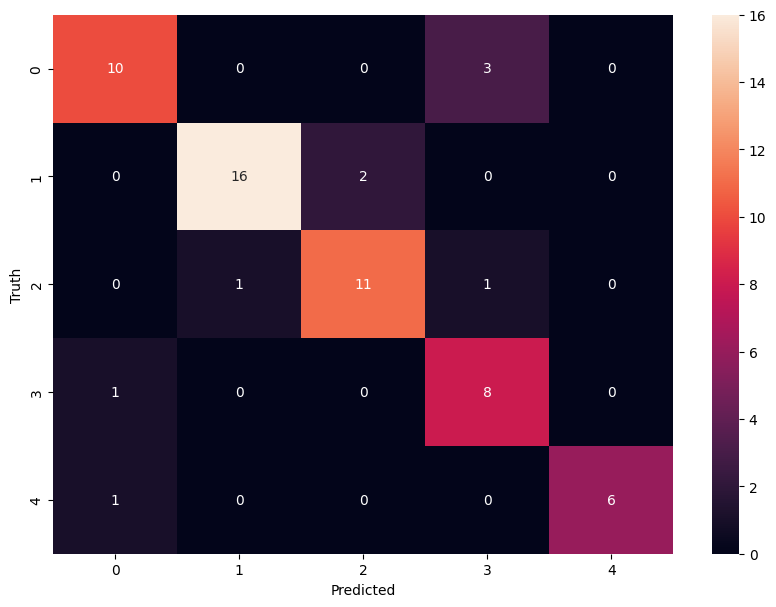

In [63]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [64]:
classDict

{'kartik aryaan': 0,
 'kiara advani': 1,
 'shraddha kapoor': 2,
 'siddharth malhotra': 3,
 'virat kohli': 4}

In [66]:
print(classification_report(y_test, best_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        13
           1       0.94      0.89      0.91        18
           2       0.85      0.85      0.85        13
           3       0.67      0.89      0.76         9
           4       1.00      0.86      0.92         7

    accuracy                           0.85        60
   macro avg       0.86      0.85      0.85        60
weighted avg       0.86      0.85      0.85        60



In [67]:
!pip install joblib
import joblib

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [68]:
joblib.dump(best_clf, 'updated_model.pkl') 

['updated_model.pkl']

In [69]:
import json
with open("classDict.json","w") as f:
    f.write(json.dumps(classDict))